In [2]:
import pandas as pd
import numpy as np
# from mlxtend.plotting import plot_decision_regions
     

In [3]:
df=pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

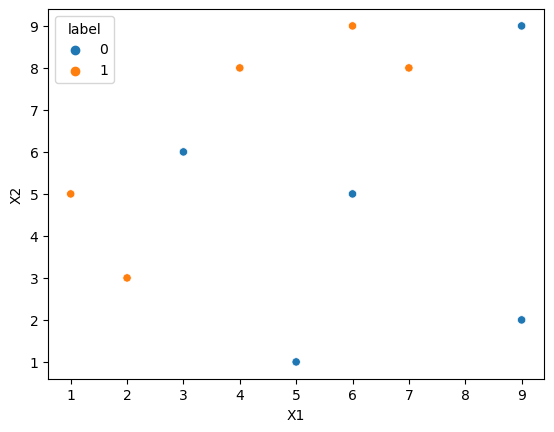

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [7]:
df['weight']=1/df.shape[0]

In [8]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1=DecisionTreeClassifier(max_depth=1)

In [13]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]

In [14]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

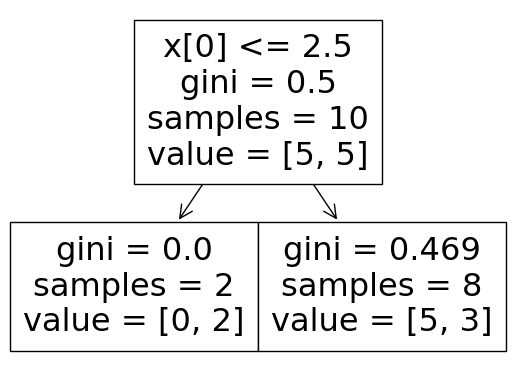

In [15]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [16]:
df['predict']=dt1.predict(x)

In [17]:
df

,X1,X2,label,weight,predict
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [39]:
def cal_error(error):
  return 0.5*np.log((1-error)/(error+0.000001))


In [19]:
alpha1=cal_error(0.3)
alpha1

0.42364893019360184

In [20]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['predict']:
    return row['weight'] * np.exp(-alpha)
  else:
    return row['weight'] * np.exp(alpha)

In [21]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)


In [22]:
df

,X1,X2,label,weight,predict,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [23]:
df['updated_weights'].sum()


0.9165153319682015

In [24]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()


In [25]:
df

,X1,X2,label,weight,predict,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [26]:
df['nomalized_weights'].sum()


1.0

In [27]:
df['cumsum_upper']=np.cumsum(df['nomalized_weights'])

In [28]:
df['cumsum_lowwer']=df['cumsum_upper']-df['nomalized_weights']

In [30]:
df.drop(['nomalized_weights'],axis=1)

,X1,X2,label,weight,predict,updated_weights,cumsum_upper,cumsum_lowwer
0,1,5,1,0.1,1,0.065508,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,1.000000,0.928525


In [ ]:
df

In [33]:
for index,row in df.iterrows():
    print(index)
    print(row)


0
X1                   1.000000
X2                   5.000000
label                1.000000
weight               0.100000
predict              1.000000
updated_weights      0.065508
nomalized_weights    0.071475
cumsum_upper         0.071475
cumsum_lowwer        0.000000
Name: 0, dtype: float64
1
X1                   2.000000
X2                   3.000000
label                1.000000
weight               0.100000
predict              1.000000
updated_weights      0.065508
nomalized_weights    0.071475
cumsum_upper         0.142950
cumsum_lowwer        0.071475
Name: 1, dtype: float64
2
X1                   3.000000
X2                   6.000000
label                0.000000
weight               0.100000
predict              0.000000
updated_weights      0.065508
nomalized_weights    0.071475
cumsum_upper         0.214425
cumsum_lowwer        0.142950
Name: 2, dtype: float64
3
X1                   4.000000
X2                   8.000000
label                1.000000
weight              

In [36]:
def create_new_dataset(df):
    indecies=[]
    
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lowwer']:
                indecies.append(index)
                
            
    return indecies        

In [37]:
index_values = create_new_dataset(df)

index_values
     

[4, 3, 5, 3, 7, 8, 9, 9, 7, 8]

In [38]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weight
4,5,1,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
